---
# Ejercicio 14
**a)** Escriba un programa que utilice el algoritmo del adelgazamiento para generar el numero de eventos y
las primeras unidades de tiempo de un proceso de Poisson no homogéneo con función de intensidad:
- **i)**
$$
\lambda(t) = 3 + \frac{4}{t+1}, \quad 0\leq t \leq 3
$$ 

In [51]:
from random import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Callable, Tuple
from math import log
sns.set_theme(style='darkgrid')

Primero debemos notar que como $\lambda (t)$ está acotada en $\forall t \in [0,3]$ y es decreciente, alcanza su máximo en el menor valor de $x$, i.e $t=0$.

Por lo tanto $\lambda(t) \leq 7$

Sea $\lambda = 7$

Por propocisión tenemos que si $M(t)$ es un *proceso homogéneo con intensidad* $\lambda$, y consideramos $N(t)$ al proceso que cuenta los eventos de $M(t)$ con probabilidad $\frac{\lambda(t)}{\lambda}$, entonces $N(t)$ resulta el *proceso de Poisson no homogéneo con intensidad* $\lambda(t)$. Luego:

In [19]:
def lamda_i(t:float) -> float:
    """
    Función de intensidad lambda del inciso i

    Args:
        t (float): Parámetro de la intensidad

    Returns:
        float: Intensidad en t
    """
    return np.where(
        (0 <= t) & (t <= 3),
        3 + (4 / (t+1)),
        0
    )

In [52]:
def nonH_Poisson_thinning(lamda_t:Callable[[float], float], lamda:float, T:float) -> Tuple[float, float]:
    """
    Proceso de Poisson No Homogéneo con Adelgazamiento

    Args:
        lamda_t (Callable[[float], float]): _description_
        lamda (float): _description_
        T (float): _description_

    Returns:
        Tuple[float, float]: Número de eventos hasta el tiempo t,
                             Tiempos de arribo hasta el tiempo t
    """
    NT = 0
    arrival_times = []
    U = 1 - random()
    t = -log(U) / lamda
    while t <= T:
        V = random()
        if V < lamda_t(t) / lamda:
            NT += 1
            arrival_times.append(t)
        t += -log(1 - random()) / lamda
    return NT, arrival_times

In [ ]:
def graphic_NH_Poisson_events(T: float, 
                              arrival_times: list[float],
                              lambda_t: Callable[[float], float], 
                              lambda_const: float):
    
    palette = sns.color_palette("magma")

    x = np.linspace(0, T, 1000)
    y_lambda_t = lambda_t(x)
    y_lambda_const = np.full_like(x, lambda_const)

    plt.figure(figsize=(15, 5))
    
    # lambda(t) y lambda
    sns.lineplot(x=x, y=y_lambda_t, color=palette[0], label=r"$\lambda(t)$")
    sns.lineplot(x=x, y=y_lambda_const, color=palette[1], label=r"$\lambda$ (cota)")
    
    plt.scatter(arrival_times, np.zeros_like(arrival_times), color=palette[2], zorder=5, label="Arribos")

    plt.scatter(x=T, y=0, color=palette[3], label="T", zorder=6)


    units = np.arange(1, int(T) + 1)
    plt.scatter(units, np.zeros_like(units), color='black', zorder=4, label="Unidades")
    plt.hlines(y=0, xmin=0, xmax=T, color='gray', linewidth=1)

    xticks = np.unique(np.concatenate([units, np.round(arrival_times, 2)]))
    plt.xticks(xticks, rotation=45, fontsize=9)
    plt.xlim(0, T)
    plt.ylim(-0.5, lambda_const + 1)
    plt.title(f"Eventos y función de intensidad hasta T = {T}")
    plt.xlabel("Tiempos")
    plt.yticks([])
    plt.legend(loc='center left')
    plt.show()

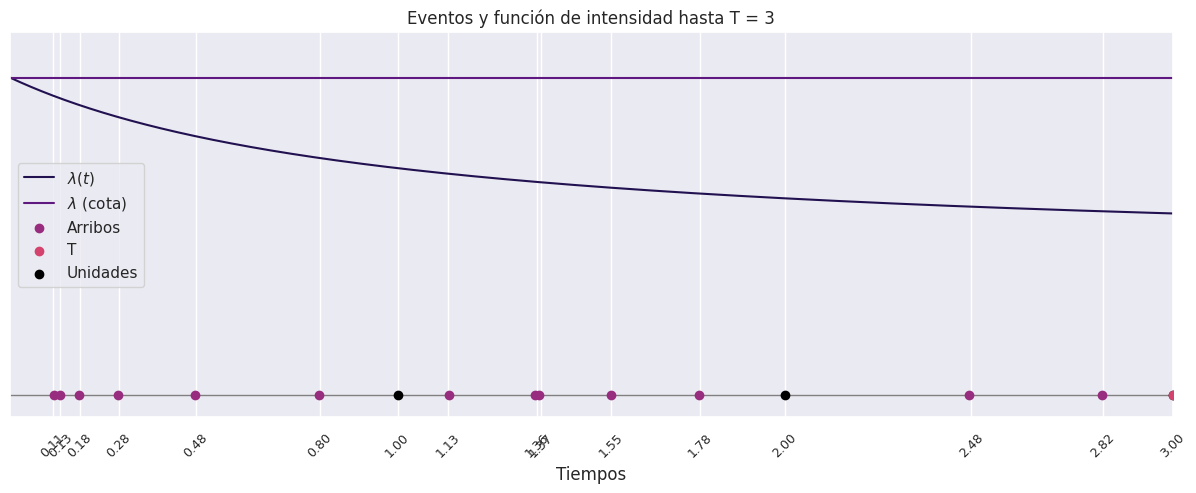

In [93]:
NT, arrival_times = nonH_Poisson_thinning(lamda_t=lamda_i, lamda=7, T=3)
graphic_NH_Poisson_events(T=3, arrival_times=arrival_times, lambda_t=lamda_i, lambda_const=7)

---
- **ii)**
$$
\lambda(t) = (t - 2)²-5t+17, \quad 0\leq t \leq 5
$$ 

Primero debemos notar que como $\lambda (t)$ está acotada en $\forall t \in [0,5]$ y es decreciente, alcanza su máximo en el menor valor de $t$, i.e $t=0$.


Por lo tanto 
$$
\begin{align*}
    \lambda(0) = (0-2)²-5*0+17 \\[0.4cm] 
    \lambda(0) = 4 + 17\\[0.4cm]
    \lambda(0) = 21
\end{align*}
$$

Luego $\forall t \in [0,5], \lambda(t) \leq 21$

Sea $\lambda = 21$



In [4]:
def lamda_ii(t:float) -> float:
    """
    Función de intensidad lambda del inciso ii

    Args:
        t (float): Parámetro de la intensidad

    Returns:
        float: Intensidad en t
    """
    return np.where(
        (0 <= t) & (t <= 5),
        ((t - 2) ** 2) - 5*t + 17,
        0
    )

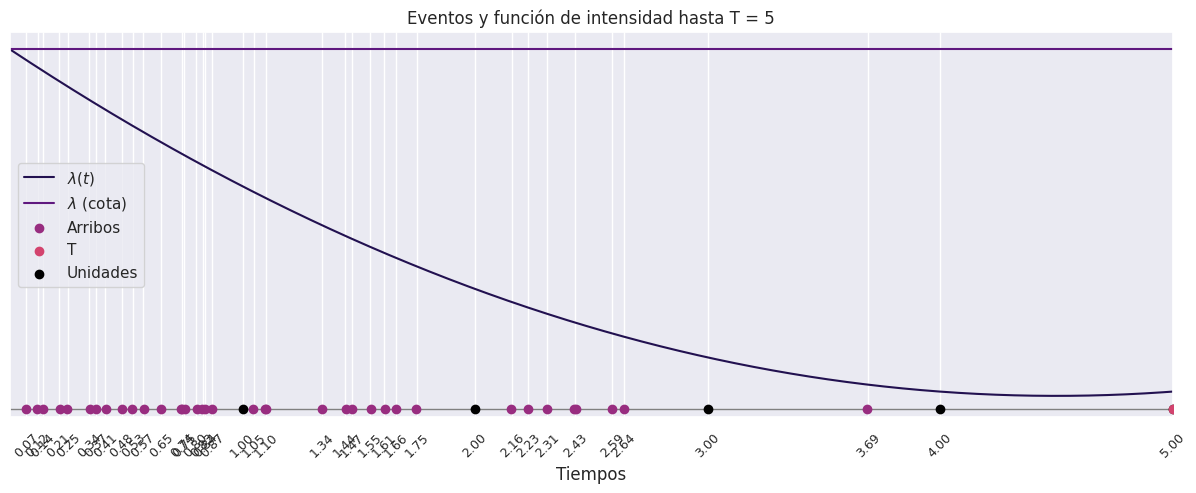

In [94]:
NT, arrival_times = nonH_Poisson_thinning(lamda_t=lamda_ii, lamda=21, T=5)
graphic_NH_Poisson_events(T=5, arrival_times=arrival_times, lambda_t=lamda_ii, lambda_const=21)

---
- **iii)**
$$
\lambda(t) =
\begin{cases}
    \frac{t}{2}-1   \quad \text{si } 2\leq t < 3 \\[0.4cm]
    1 - \frac{t}{6} \quad \text{si } 3\leq t \leq 6 \\[0.4cm]
    0               \quad \text{ cc}
\end{cases}
$$

Primero debemos notar que como $\lambda (t)$ es una función definida por partes, está acotada en distintos puntos.

Además es una densidad triangular, luego por lo visto en ejercicios anteriores, tenemos que:
- Tiene mínimo,
- Tiene máximo,
- Tiene una moda, donde la moda es el máximo

Por lo tanto como la moda está en $t=3$
$$
\begin{align*}
    \lambda(3) = 1 - \frac{3}{6} \\[0.4cm] 
    \lambda(3) = 1- \frac{1}{2}    \\[0.4cm]
    \lambda(3) = \frac{1}{2}
\end{align*}
$$

Luego $\forall t \in [2,6], \lambda(t) \leq \frac{1}{2}$

Sea $\lambda = \frac{1}{2}$



In [ ]:
def lamda_iii(t:float) -> float:
    """
    Función de intensidad lambda del inciso iii

    Args:
        t (float): Parámetro de la intensidad

    Returns:
        float: Intensidad en t
    """
    return np.where(
        (2 <= t) & (t < 3),
        (t / 2) - 1,
        np.where(
            (3 <= t) & (t <= 6),
            1 - (t / 6),
            0
        )
    )

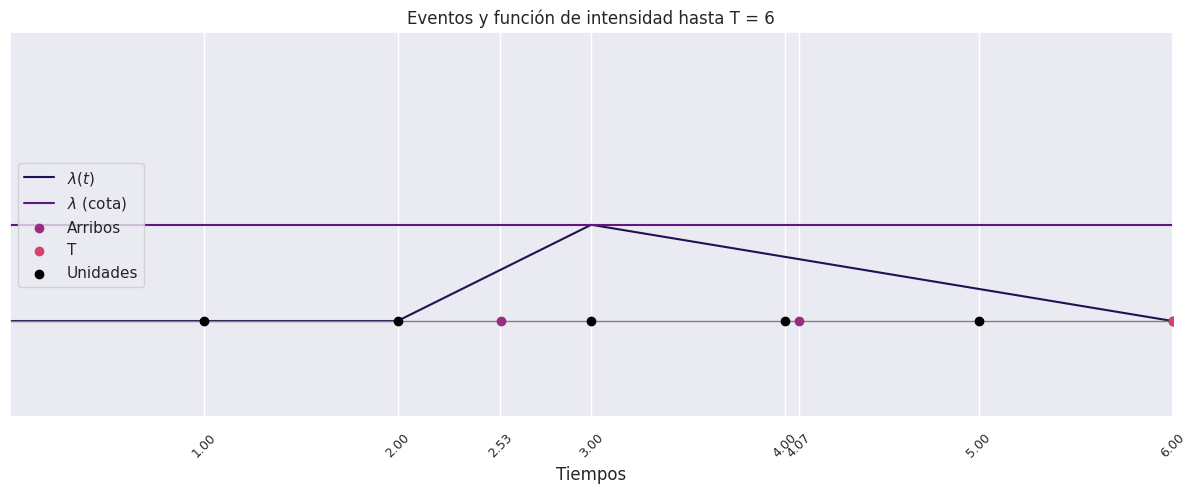

In [105]:
NT, arrival_times = nonH_Poisson_thinning(lamda_t=lamda_iii, lamda=1/2, T=6)
graphic_NH_Poisson_events(T=6, arrival_times=arrival_times, lambda_t=lamda_iii, lambda_const=1/2)

---
**b)** Indique una forma de mejorar el algoritmo de adelgazamiento para estos ejemplos usando al menos
3 intervalos.

Una forma de mejorar el algoritmo de adelgazamiento es aplicarlo por partes, es decir en los intervalos en los cuales está definida la función de densidad tomar subintervalos y aplicar el algoritmo de adelgazamiento.

Ya que se debe notar que el algoritmo es más eficiente cuanto más esté $\lambda$ de $\lambda(t)$, ya que en ese caso $\frac{\lambda(t)}{\lambda}$ es próximo a 1.

Se debe tener en cuenta que al particionar en subintervalos para $(0,T)$ se debe tomar un $\lambda_i$ adecuado

- **i)**
$$
\lambda(t) = 3 + \frac{4}{t+1}, \quad 0\leq t \leq 3
$$ 

Tomo los intervalos:
$$
I_1 = [0,1),\quad \quad I_2=[1,2), \quad \quad I_3=[2,3]
$$

Luego acotamos cada intervalo con $\lambda_1, \lambda_2, \lambda_3$ tal que:
$$
\lambda(s) \leq \lambda_i,\quad s\in [t_{i-1},t)
$$

Nuevamente como $\lambda(t)$ es una función decreciente, encontramos una cota para cada intervalo en el punto máximo de cada uno, i.e para el  $min$ t  tal que:
$$
 \{t \in I_i | \forall s \in I_i: \lambda(s) \leq \lambda(t)\}
$$

Luego:
$$
\begin{align*}
\lambda_1 &= \lambda(0),\quad \lambda_2 &= \lambda(1),\quad \lambda_3 &=\lambda(2)\\[0.4cm]
\lambda_1 &= 7, \quad\quad \lambda_2 &= 5, \quad   \lambda_3 &= 3+\frac{4}{3}
\end{align*}
$$


In [114]:
def nonH_Poisson_thinning_optimized(intervals:list[int],
                                    lamda_i:list[float],
                                    lamda_t:Callable[[float], float],
                                    T:int) -> Tuple[float, float]:
    assert len(intervals) == len(lamda_i), "#Intervalos != #Cotas Lambda"
    i = 0 # Iterador de intervalos
    t = -log(1 - random()) / lamda_i[i] # Genero la Poisson Homogénea
    NT = 0
    arrival_times = []
    while t <= T:
        if t <= intervals[i]: #Problema cuando los t caiga en los extremos de los intervalos
            V = random()
            if V < lamda_t(t) / lamda_i[i]: #Problema cuando t no esté definida para lamda_t
                NT += 1
                arrival_times.append(t)
            t += -log(1 - random()) / lamda_i[i]
        else:
            if i+1 >= len(intervals):
                break
            t = intervals[i] + (t - intervals[i]) * lamda_i[i] / lamda_i[i+1]
            i += 1
    return NT, arrival_times


In [124]:
def graphic_NH_Poisson_events(T: float, 
                              arrival_times: list[float],
                              lambda_t: Callable[[float], float], 
                              lambda_consts: list[float]):
    
    palette = sns.color_palette("magma")

    x = np.linspace(0, T, 1000)
    y_lambda_t = lambda_t(x)
    y_lamdas = []
    for lamda in lambda_consts:
        y_lamdas.append(np.full_like(x, lamda))


    plt.figure(figsize=(15, 5))
    
    # lambda(t) y lambda
    sns.lineplot(x=x, y=y_lambda_t, color=palette[0], label=r"$\lambda(t)$")
    for lamda in y_lamdas:
        sns.lineplot(x=x, y=lamda, color=palette[int(random()*5)+1], label=r"$\lambda$ (cota)")
    
    plt.scatter(arrival_times, np.zeros_like(arrival_times), color=palette[2], zorder=5, label="Arribos")

    plt.scatter(x=T, y=0, color=palette[3], label="T", zorder=6)


    units = np.arange(1, int(T) + 1)
    plt.scatter(units, np.zeros_like(units), color='black', zorder=4, label="Unidades")
    plt.hlines(y=0, xmin=0, xmax=T, color='gray', linewidth=1)

    xticks = np.unique(np.concatenate([units, np.round(arrival_times, 2)]))
    plt.xticks(xticks, rotation=45, fontsize=9)
    plt.xlim(0, T)
    plt.ylim(-0.5, max(lambda_consts) + 1)
    plt.title(f"Eventos y función de intensidad hasta T = {T}")
    plt.xlabel("Tiempos")
    plt.yticks([])
    plt.legend(loc='center left')
    plt.show()

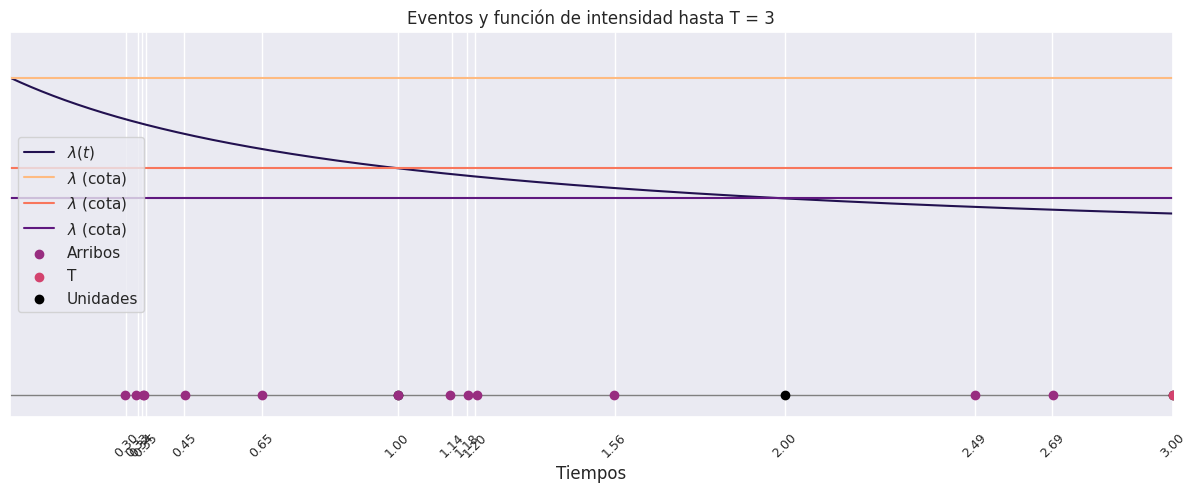

In [125]:
intervals = [1, 2, 3]
lamdas = [7, 5, 3+4/3]
T = 3
NT, arrival_times = nonH_Poisson_thinning_optimized(intervals=intervals,
                                                    lamda_i=lamdas,
                                                    lamda_t=lamda_i,
                                                    T=T)

graphic_NH_Poisson_events(T=T, arrival_times=arrival_times, lambda_t=lamda_i, lambda_consts=lamdas )

---
- **ii)**
$$
\lambda(t) = (t - 2)²-5t+17, \quad 0\leq t \leq 5
$$ 

Tomo los intervalos:
$$
I_1= [0,2),\quad  \quad I_2= [2,4), \quad  \quad I_3= [4,5]
$$

Con la misma explicación que para  *i.* obtenemos que las cotas $\lambda_1, \lambda_2$ y $\lambda_3$ son para los subintervalos respectivamente, tal que:
- $\lambda_1 = \lambda(0) = 2^2 -5*0 + 17 = 21$
- $\lambda_2 = \lambda(2) = 0 - 10 + 17 = 7$
- $\lambda_3 = \lambda(4) = 2² -5\cdot 4 + 17 = 1$


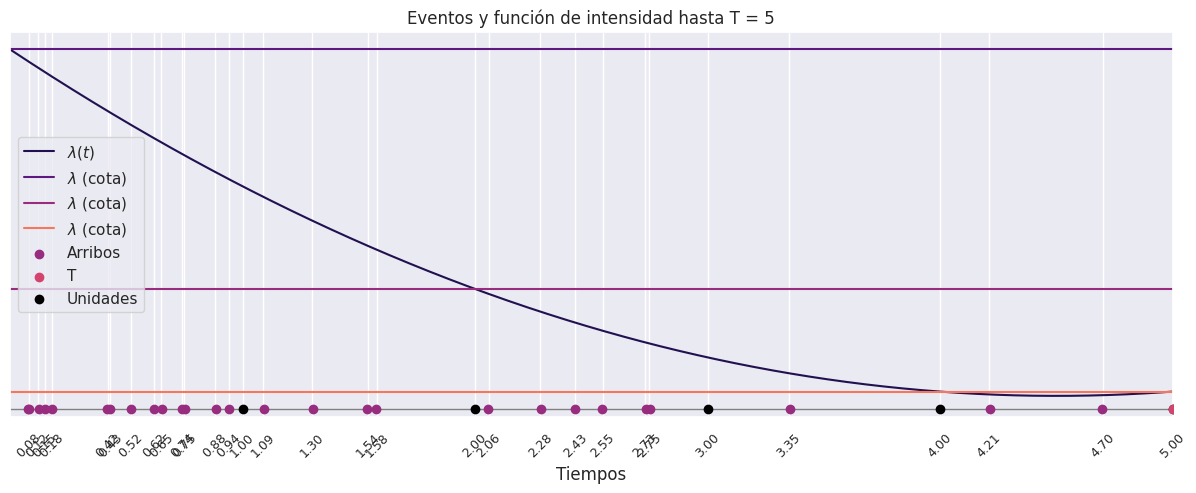

In [126]:
intervals = [2, 4, 5]
lamdas = [21, 7, 1]
T = 5
NT, arrival_times = nonH_Poisson_thinning_optimized(intervals=intervals,
                                                    lamda_i=lamdas,
                                                    lamda_t=lamda_ii,
                                                    T=T)

graphic_NH_Poisson_events(T=T, arrival_times=arrival_times, lambda_t=lamda_ii, lambda_consts=lamdas )

---
- **iii)**
$$
\lambda(t) =
\begin{cases}
    \frac{t}{2}-1   \quad \text{si } 2\leq t < 3 \\[0.4cm]
    1 - \frac{t}{6} \quad \text{si } 3\leq t \leq 6 \\[0.4cm]
    0               \quad \text{ cc}
\end{cases}
$$

Tomo los intervalos:
$$
I_1= [2,3),\quad  \quad I_2= [3,5), \quad  \quad I_3= [5, 6]
$$

Con la misma explicación que para  *i.* y que *ii.* sólo que teniendo en cuenta que es una densidad triangular. Luego obtenemos que las cotas $\lambda_1, \lambda_2$ y $\lambda_3$ son para los subintervalos respectivamente, tal que:
- $\lambda_1 = \lambda(3) = 0.5 $
    - Alcanza cota en la moda.
- $\lambda_2 = \lambda(3) = 0.5 $
    - Alcanza cota en la moda.
- $\lambda_3 = \lambda(5) = 1 - \frac{5}{6} $
    -    Esta parte de la densidad es decreciente por ende alcanza su punto máximo en el menor valor de t.      

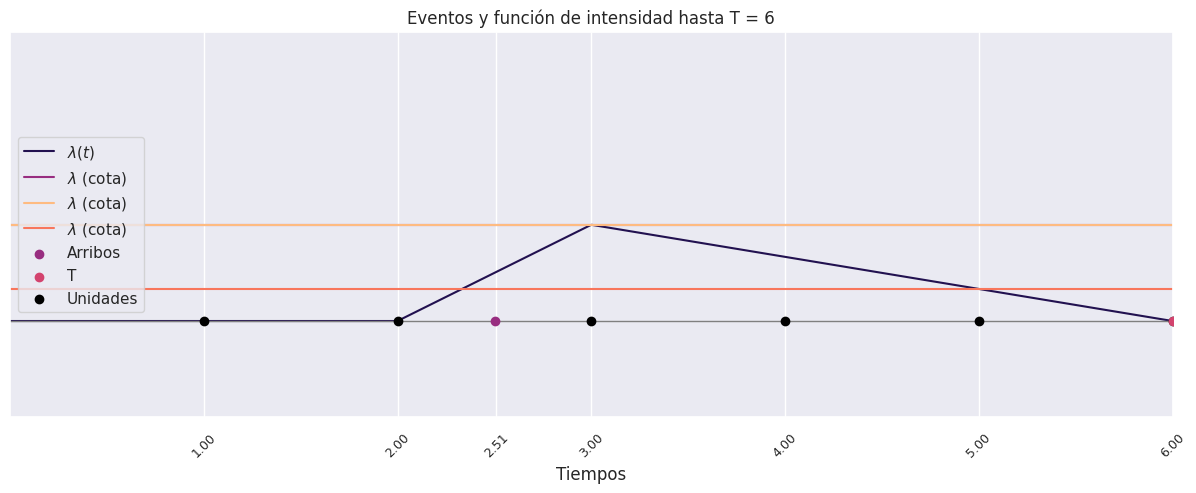

In [127]:
intervals = [3, 5, 6]
lamdas = [0.5, 0.5, 1-5/6]
T = 6
NT, arrival_times = nonH_Poisson_thinning_optimized(intervals=intervals,
                                                    lamda_i=lamdas,
                                                    lamda_t=lamda_iii,
                                                    T=T)

graphic_NH_Poisson_events(T=T, arrival_times=arrival_times, lambda_t=lamda_iii, lambda_consts=lamdas )